# Cluster Benchmarks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [3]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}

# Metric configuration. Original NMON column label, description, y-axis range, python column key
nmon_metric_options = [
    ("timestamp", "Timestamp MS since Epoch", [0, 80], "timestamp"), #0
    ("CPU_ALL:User%", "CPU Total: User %", [0,100], "cpu_all_user_percent"), # 1
    ("CPU_ALL:Sys%", "CPU Total: System %", [0,100], "cpu_all_system_percent"), # 2
    ("DISKBUSY:nvme0n1", "Disk Busy %: /dev/nvme0n1", [0,100], "disk_io_busy_percent"), #3
    ("DISKREAD:nvme0n1", "Disk Read KB/s: /dev/nvme0n1", [0,10000], "disk_io_read_KBps"), #4
    ("DISKWRITE:nvme0n1", "Disk Write KB/s: /dev/nvme0n1", [0,10000], "disk_io_write_KBps"), #5
]

# Experiments we want to plot
experiments = ["example"]
total_machines = 1

# Select a metric
chosen_metric = nmon_metric_options[4]
metric_header = chosen_metric[0]
metric_name = chosen_metric[1]
y_axis_limits = chosen_metric[2]
metric_file_suffix = chosen_metric[3]

# Set up pandas dataframe
experiment_dfs = []  # e.g.) [("example", [<Pandas DF>, ...])]
for experiment in experiments:
    dataframes = []
    for i in range(0, total_machines):
        machine_id = "n{:02d}".format(i+1)
        filename = f"{i}-{machine_id}.nmon.csv"
        filepath = f"{experiment}/{filename}"
        dataframe = pd.read_csv(filepath, header=0)
        dataframes.append(dataframe.pop(metric_header))

    experiment_dfs.append((experiment, dataframes))


## Plotting

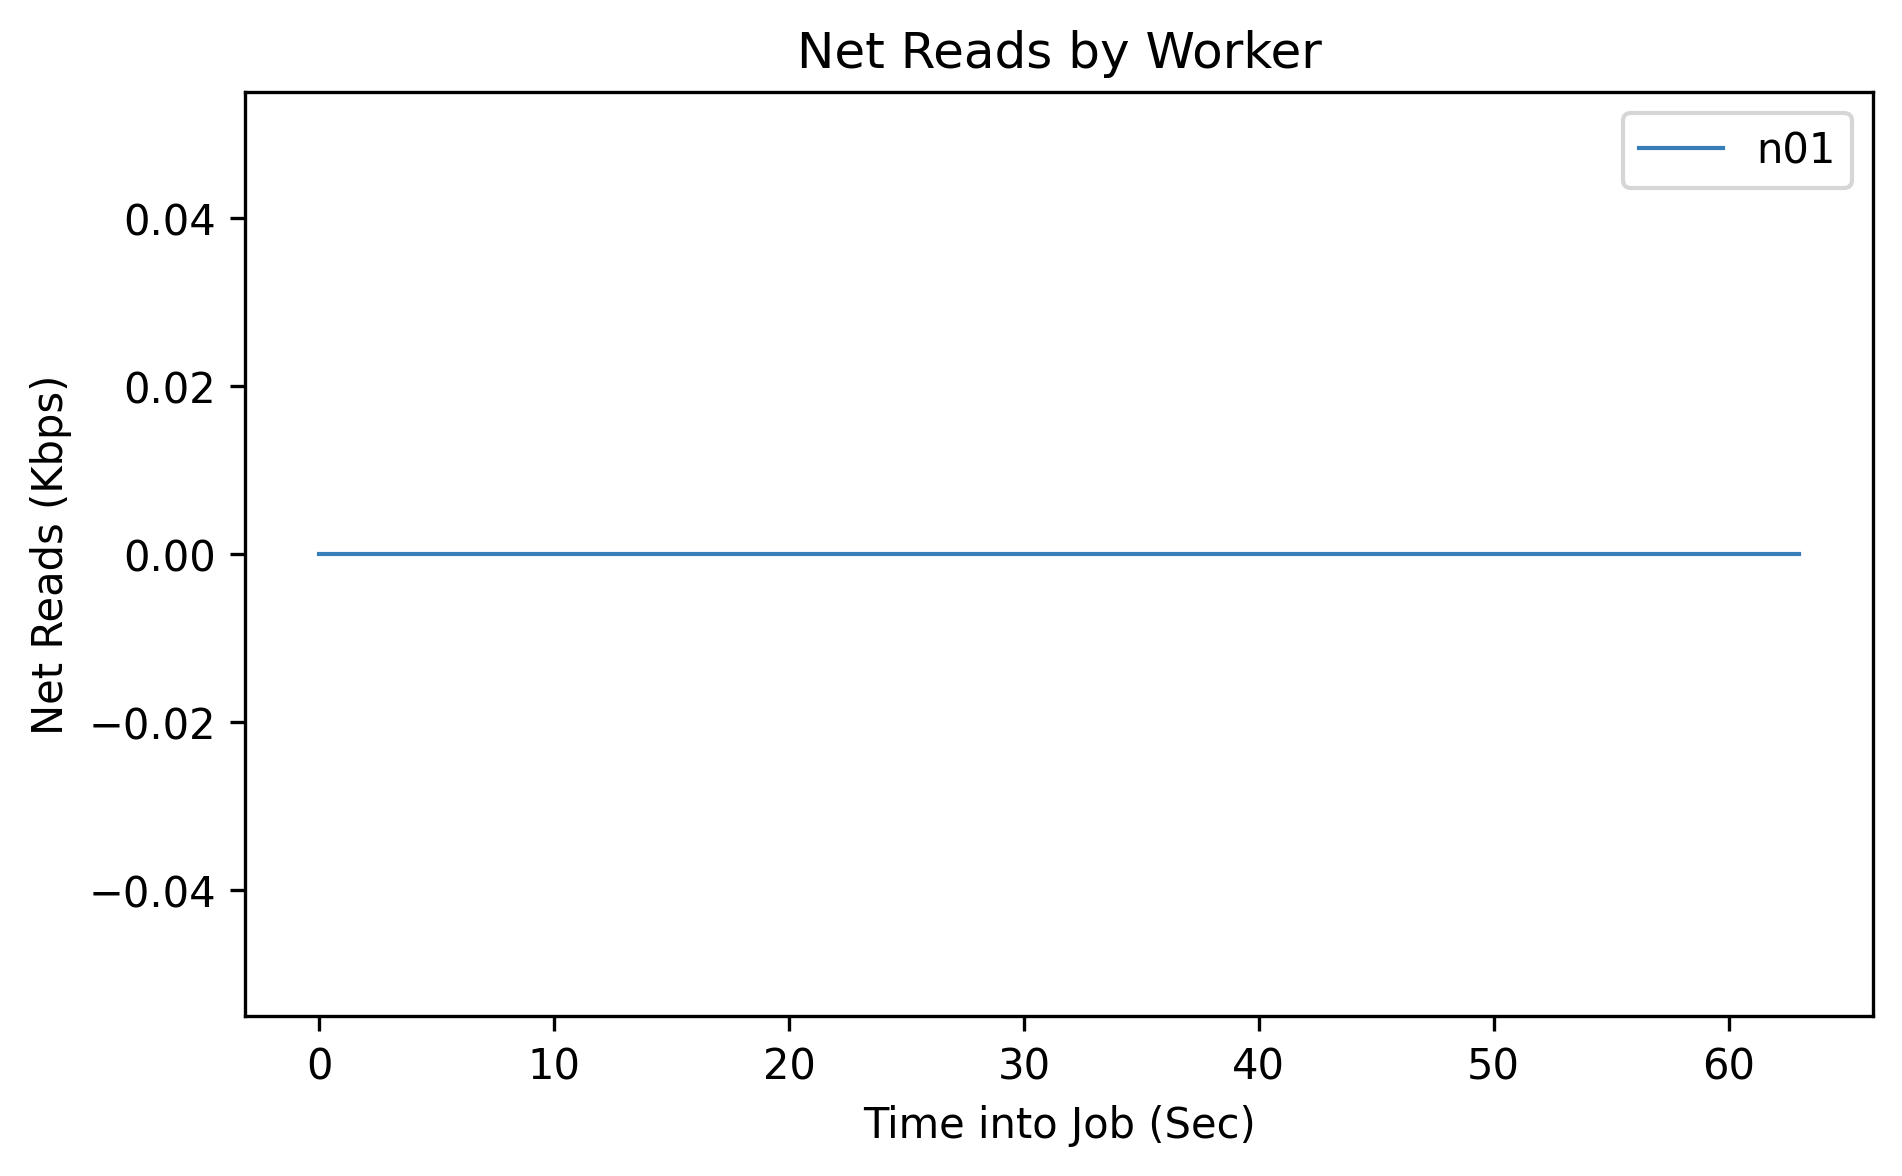

In [4]:
number_rows = 1
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(7, 4), dpi=300)

ax.plot(experiment_dfs[0][1][0], lw=1, label=f"{machine_id}", color=CB_color_cycle["blue"])

ax.set_title("Disk Reads by Worker")
ax.set_ylabel("Disk Reads (KBps)")
ax.set_xlabel("Time into Job (Sec)")

ax.legend()

plt.show()